# Requisito 1
##Avaliar como está o comportamento na série temporal (2010, 2011, 2012, até 2025) das seguintes métricas:

 ● Densidade da rede

 ● Número de vértices

 ● Número de arestas

 ● Número médio de vizinhos

 ● A distribuição do número de vizinhos

In [ ]:
#Importe das bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

In [ ]:
#Importando e lendo os arquivos
file_path = [
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2010_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2011_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2012_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2013_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2014_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2015_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2016_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2017_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2018_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2019_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2020_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2021_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2022_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2023_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2024_authors_network.gexf",
    "/content/drive/MyDrive/AED2/projetos/projeto1/anos/2025_authors_network.gexf"
    ]
#Lendo cada arquivo e armazenando em uma lista
graphs_years = []
for file in file_path:
  graphs_years.append(nx.read_gexf(file))

In [ ]:
#Calculando o número de vértices para cada grafo
num_nodes = [G.number_of_nodes() for G in graphs_years]

#Calculando o número de arestas
num_edges = [G.number_of_edges() for G in graphs_years]

#Calculando a densidade de cada rede
density = [nx.density(G) for G in graphs_years]

#Calculando o número médio de vizinhos
degrees = [[deg for node, deg in G.degree()] for G in graphs_years]
avg_degree = [sum(deg) / len(deg) for deg in degrees]

#Distribuição do vizinhos
degree_count = [Counter(deg) for deg in degrees]
sort_degree_count = [dict(sorted(count.items())) for count in degree_count]




# Gráfico com 4 curvas: densidade, vértices, arestas, médio de vizinhos

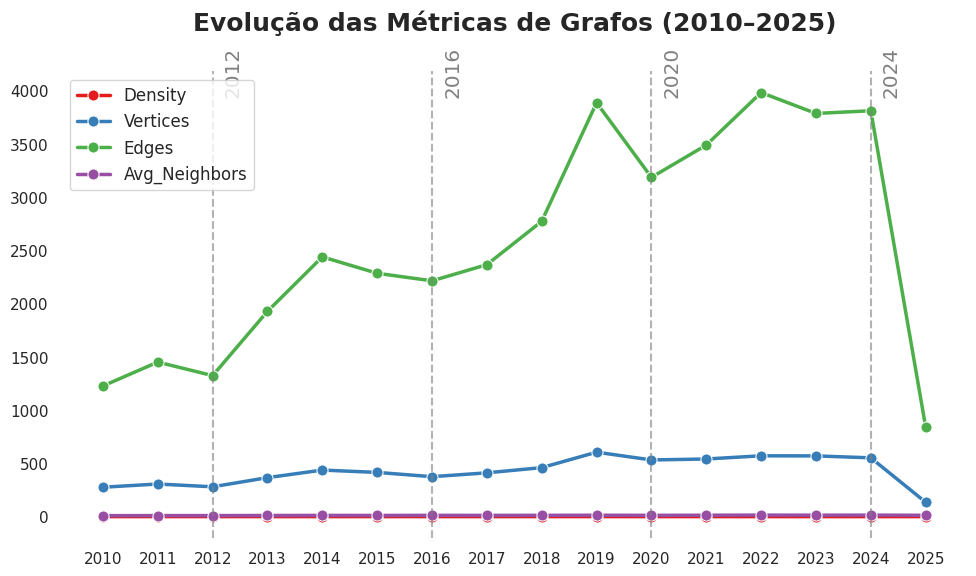

In [8]:
# Criando uma lista de anos de 2010 a 2025
years = range(2010, 2026)  # Create a list of years

# Create a DataFrame for easier plotting
df = pd.DataFrame({
    'Year': years,
    'Density': density,
    'Vertices': num_nodes,
    'Edges': num_edges,
    'Avg_Neighbors': avg_degree
})


# Converter para formato longo
df_long = pd.melt(df, id_vars="Year", var_name="Métrica", value_name="Valor")

# Paleta personalizada
cores = {
    "Density": "#e41a1c",         # vermelho forte
    "Vertices": "#377eb8",          # azul
    "Edges": "#4daf4a",           # verde
    "Avg_Neighbors": "#984ea3"  # roxo
}

sns.set(style="white", font_scale=1.2)
plt.figure(figsize=(10, 6))

# Plotando cada curva separadamente para ter controle total
for metrica in df_long["Métrica"].unique():
    dados_metrica = df_long[df_long["Métrica"] == metrica]
    sns.lineplot(
        data=dados_metrica,
        x="Year",
        y="Valor",
        label=metrica,
        marker="o",
        linewidth=2.5,
        markersize=8,
        color=cores[metrica]
    )

# Adicionando marcos de avaliação (linhas verticais)
for ano in [2012, 2016, 2020, 2024]:
    plt.axvline(x=ano, linestyle="--", color="gray", alpha=0.6)
    plt.text(ano + 0.2, plt.ylim()[1]*0.95, str(ano), color="gray", rotation=90)

# Estilização extra
plt.title("Evolução das Métricas de Grafos (2010–2025)", fontsize=18, weight='bold', pad=30)
plt.xlabel("")
plt.ylabel("")
plt.xticks(df["Year"], fontsize=11)
plt.yticks(fontsize=11)
plt.legend(title="", fontsize=12, loc='upper left')
sns.despine(left=True, bottom=True)
plt.grid(False)
plt.tight_layout()
plt.show()


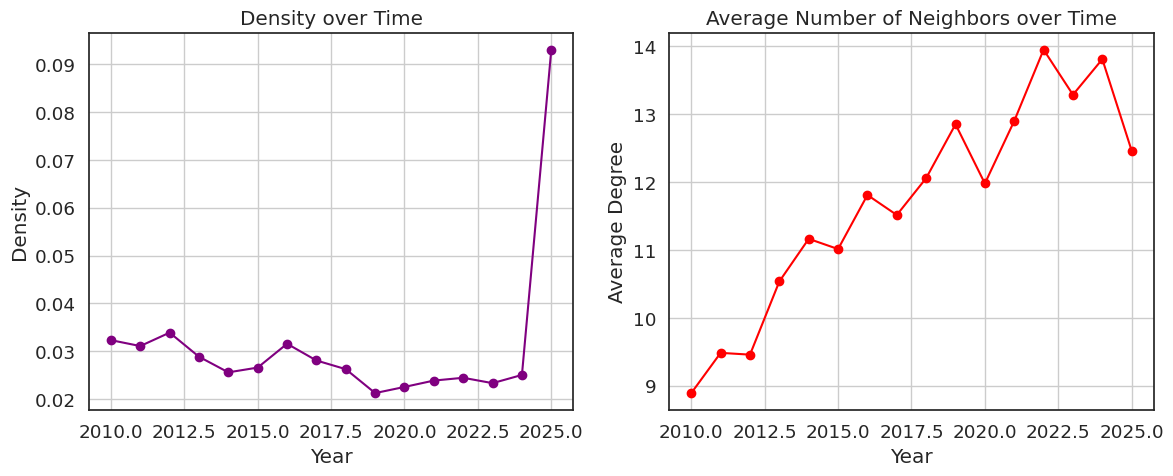

In [ ]:
# Gráfico separado para as métricas densidade e numero médio de vizinhos

import matplotlib.pyplot as plt


# Criado um plot separado para a densidade e número médio de vizinhos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
plt.plot(years, density, marker='o', linestyle='-', color="purple")
plt.title('Density over Time')
plt.xlabel('Year')
plt.ylabel('Density')
plt.grid(True)


plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
plt.plot(years, avg_degree, marker='o', linestyle='-', color="red")
plt.title('Average Number of Neighbors over Time')
plt.xlabel('Year')
plt.ylabel('Average Degree')
plt.grid(True)


plt.tight_layout()
plt.show()


# Gráfico *Ridgeline Chart* para Distribuição de número de vizinhos

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


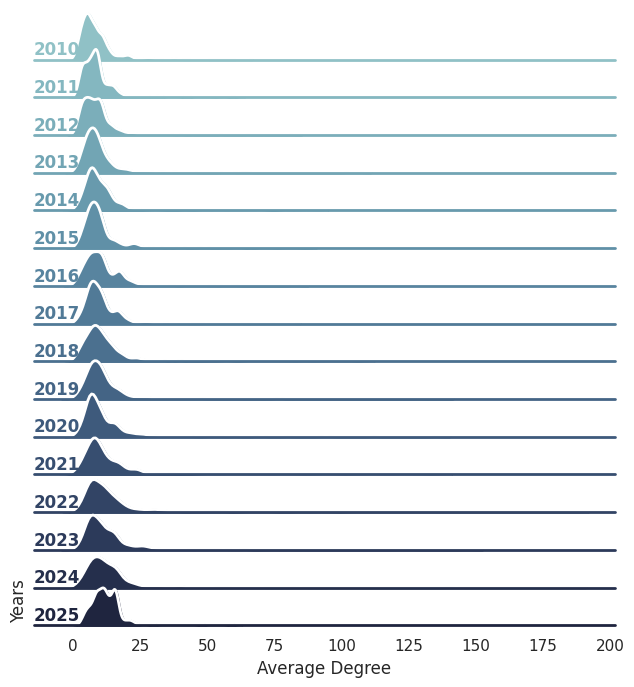

In [13]:
#gráfico da distribuição de números de vizinhos
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Transforma sort_degree_count em um DataFrame plano
data = []
for i, year in enumerate(years):
    grau_dict = sort_degree_count[i]
    for grau, freq in grau_dict.items():
        data.extend([{"Ano": str(year), "Vizinhos": grau}] * freq)

df = pd.DataFrame(data)

# Ordena os anos corretamente no eixo y
df["Ano"] = pd.Categorical(df["Ano"], categories=sorted(set(df["Ano"])), ordered=True)

# Paleta de cores
pal = sns.cubehelix_palette(len(df["Ano"].unique()), rot=-.25, light=.7)

# FacetGrid para fazer o ridgeline
g = sns.FacetGrid(df, row="Ano", hue="Ano", aspect=15, height=.5, palette=pal)

# Curvas KDE preenchidas
g.map(sns.kdeplot, "Vizinhos",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Contorno branco
g.map(sns.kdeplot, "Vizinhos", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Linha base
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Função para adicionar rótulos
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Vizinhos")

# Ajusta sobreposição
g.figure.subplots_adjust(hspace=-.25)

# Remove detalhes dos eixos
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

# Mostra o gráfico

plt.xlabel("Average Degree")
plt.ylabel("Years")
plt.show()


# Análise dos resultados

*   O que foi feito? Como foi feito? Principais achados? Dificuldades? Suas
hipóteses sobre os achados?



Para o primeiro requisito, foi realizada uma análise da série temporal das redes de coautoria no período de 2010 a 2025 em que avaliou-se o comportamento de cada rede com base nas seguintes métricas: densidade da rede, número de vértices, número de arestas, número médio de vizinhos e distribuição do número de vizinhos.

A princípio, realizou-se a leitura de cada arquivo da rede temporal utilizando a biblioteca de grafos *NetworkX*. Como o processo descrito a seguir deveria ser repetido para cada rede das bases de dados, optou-se por armazenar os grafos em uma lista. Em seguida, foram calculados, para cada grafo, os números de arestas, vértices, o número médio de vizinhos e a distribuição do número de vizinhos, utilizando funções fornecidas pela biblioteca e armazenando esses valores — conforme demonstrado no código em anexo — em suas respectivas listas.

Com os dados obtidos, foi gerado um gráfico para visualizar a evolução, ao longo dos anos, de quatro métricas: densidade, número de vértices, número de arestas e número médio de vizinhos. Para isso, foram utilizadas as bibliotecas Matplotlib e Seaborn. No gráfico, também foram indicados marcos importantes referentes às avaliações do PPgEEC (2012, 2016, 2020 e 2024).

# Dificuldades e hipóteses sobre os principais achados

A partir da análise dos gráficos, foram observadas algumas informações relevantes:

- O número de arestas cresceu ao longo dos anos, indicando um aumento nas colaborações entre autores, com um pico em 2019. Uma possível explicação seria o crescimento do programa.

- O número de vértices apresentou crescimento gradual, com pico em 2019, decréscimo em 2020 e, em seguida, estabilização na quantidade de autores publicando.

- O número médio de vizinhos revelou um dado interessante: houve uma queda em 2020, ano da pandemia, mas retomou o crescimento nos anos seguintes, apesar das restrições do isolamento social.

- A densidade da rede não apresentou variações significativas ao longo dos anos; no entanto, nos períodos com mais projetos colaborativos, observou-se picos nessa métrica.

Com base nesses insights, é possível levantar algumas hipóteses para explicar os resultados encontrados. Por exemplo, pode haver uma correlação entre o número de vértices e o número médio de vizinhos, no sentido de que o aumento constante de vértices após 2020 pode estar associado a um crescimento das colaborações. Outra hipótese é que, diante das dificuldades impostas pela pandemia, o programa tenha incentivado a realização de projetos interdisciplinares.

Além disso, a baixa densidade pode indicar que os pesquisadores preferem colaborar com um grupo restrito. Já os picos de colaborações em anos específicos podem estar relacionados ao fortalecimento do programa ou a ações de incentivo à produção coletiva.


# Distribuição do número de vizinhos

Para a distribuição de número de vizinhos, foi calculado o grau de cada nó, gerando as distribuições anuais desses valores e a visualização realizada por meio de gráficos de densidade, usando o modelo ***Ridgeline Chart*** da biblioteca *seaborn*.  

Observa-se que a distribuição é assimétrica ao longo dos anos, com concentração entre 5 e 10 colaborações por autor. Essa forma de curva se manteve semelhante no tempo, com um pico nas colaborações entre poucos autores e uma “cauda longa”, indicando a presença de hubs. A partir de 2022, nota-se um aumento significativo na curva da densidade e um leve achatamento em 2025, o que pode ser interpretado como um sinal de que mais autores passaram a ampliar suas redes de colaboração — talvez reflexo do crescimento do programa ou de projetos colaborativos.

Outras hipóteses a serem levantadas são:

- A presença constante de autores com muitas conexões, sugere a docentes orientadores ou pesquisadores com alta produção e rede extensa.
- O aumento nas conexões a partir de 2022 pode estar associada à retomada pós-pandemia quando as colaborações voltaram a crescer.

# Dificuldades enfrentadas

As principais dificuldades enfrentadas concentraram-se em compreender o significado de cada métrica no contexto da análise de redes de coautoria. Ademais, houve desafios na escolha da melhor forma de visualizar a distribuição do número de vizinhos. Para resolver esse problema, foi realizada uma pesquisa no site da biblioteca Seaborn e, posteriormente, solicitado ao ChatGPT (modelo GPT-4o) que adaptasse o gráfico do tipo Ridgeline Chart para os dados utilizados. O prompt usado foi:

```
ajuste esse código para as variaveis que quero. Sendo as variaveis: a distribuição de vizinhos esta na variavel: sort_degree_count em que ele é um degree_count = [Counter(deg) for deg in degrees]
sort_degree_count = [dict(sorted(count.items())) for count in degree_count] . Vertices: num_nodes. os anos esta em years. E o código: import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)
```